In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
install_payments = pd.read_csv('D:/Data group project DPV/installments_payments.csv')
app_train = pd.read_csv('D:/Data group project DPV/application_train.csv')

**installments_payments.csv**


*   Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
*   There is
    *   a) one row for every payment that was made plus
    *   b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


**installments_payments.csv FEATURE DESCRIPTION**

**SK_ID_PREV:** The ID of previous credit in Home Credit related to loan in our sample

**SK_ID_CURR:** ID of loan in our sample

**NUM_INSTALMENT_VERSION:** Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

**NUM_INSTALMENT_NUMBER:** On which installment we observe payment(lan tra thu bao nhieu)

**DAYS_INSTALMENT:** When the installment of previous credit was supposed to be paid (relative to application date of current loan)(ngay phai tra)

**DAYS_ENTRY_PAYMENT:** When was the installments of previous credit paid actually (relative to application date of current loan)(ngay khach hang tra)

**AMT_INSTALMENT:** What was the prescribed installment amount of previous credit on this installment(luong tien phai tra)

**AMT_PAYMENT:** What the client actually paid on previous credit on this installment(luong tien khach hang tra)

In [4]:
install_payments.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [5]:
install_payments[install_payments['SK_ID_CURR'] == 100001]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050


In [6]:
install_payments.shape

(13605401, 8)

In [7]:
install_payments.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [8]:
install_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


**Basic EDA**

In [9]:
install_payments.duplicated().sum()

0

In [10]:
# NUMBER OF NULL VALUES IN EACH COLUMN
install_payments.isna().sum().sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        2905
AMT_PAYMENT               2905
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
AMT_INSTALMENT               0
dtype: int64

In [11]:
# PERCENTAGE OF NULL VALUES IN EACH COLUMN
(install_payments.isna().sum() / install_payments.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

Two columns: the day and the amount customers actually paid (DAYS_ENTRY_PAYMENT and AMT_PAYMENT) include the same amount of null values

0.02% of clients haven't paid previous credit on this installment

In [12]:
install_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845


That the average AMT_INSTALLMENTS (the prescribed installment amount on this installment is) smaller than AMT_PAYMENTS (the amount client actually paid on this installment) suggests:

Some loans are not repayed on time

array([[<AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'DAYS_ENTRY_PAYMENT'}>]],
      dtype=object)

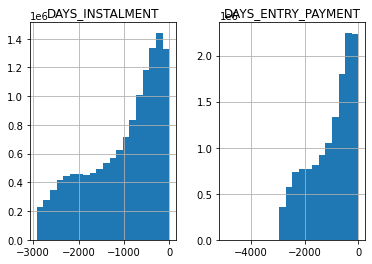

In [13]:
# histogram
install_payments.iloc[:,4:6].hist(bins=20)

The histogram of prescribed installment day and actually paid day also suggests late payment of the customer

Correlation

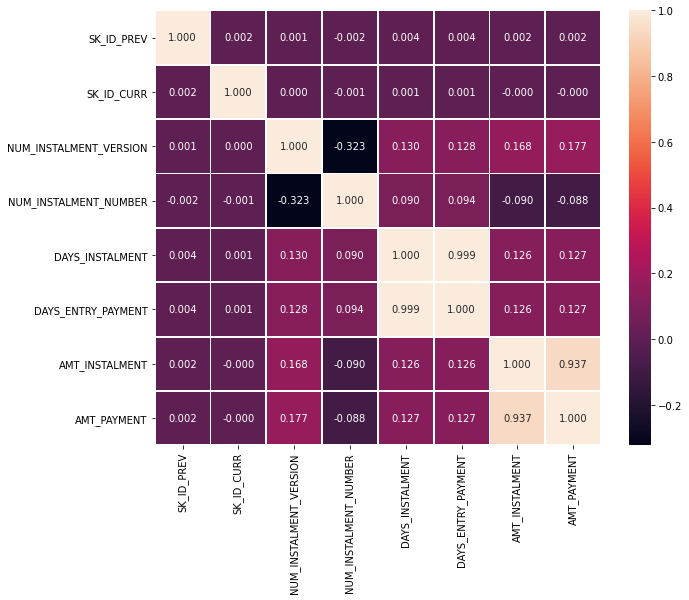

In [14]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(install_payments.corr(), annot = True, fmt = ".3f", linewidths = 1, ax = ax)

plt.show()

**Không drop cột nào**

SK_ID_CURR và SK_ID_PREV làm key

AMT_INSTALMENT và AMT_PAYMENT tuy có corr cao nhưng là biến quan trọng để xác định xem curr ID có trả hết không